In [194]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import matplotlib.colors as clr
import h5py
from tqdm import tqdm
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Roman_truth_file = '/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/dc2_truth_gal_icrs.fits'
hdu = fits.open(Roman_truth_file)
roman_data = hdu[1].data

Roman_joint_hf = h5py.File('/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/data/Rubin_Roman_gal_cross_match.h5', 'r')
joint_gal_id = Roman_joint_hf['gal_id'][:]
Roman_gal_idx = Roman_joint_hf['roman_id_idx'][:]

gal_id = np.load('/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/data/gal_id.npy')
cross_id = np.load('/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/data/cross_id.npy')

In [2]:
cd gcr-catalogs-master/

/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/gcr-catalogs-master


In [3]:
import GCRCatalogs
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_redmagic_v0.8.1_highdens')
data = gc.get_quantities([ 'id','ra', 'dec','redshift','zspec'])
# Apply Rubin-Roman joint imaging footprint mask
joint_area_mask = (data['ra'] > 51) & (data['ra'] < 56) & (data['dec'] > -42) & (data['dec'] < -38)

GCRCatalogs = 1.3.5 | GCR = 0.9.2


In [100]:
z_roman_full = list()
roman_ra_full = list()
roman_dec_full = list()
g_id = list()
for ID in tqdm(Roman_gal_idx):
    z_roman_full.append(roman_data['z'][ID])
    roman_ra_full.append(roman_data['ra'][ID])
    roman_dec_full.append(roman_data['dec'][ID])
    g_id.append(roman_data['gind'][ID])
roman_ra_full = np.array(roman_ra_full)*180/np.pi
roman_dec_full = np.array(roman_dec_full)*180/np.pi

100%|██████████| 29170/29170 [00:02<00:00, 12150.58it/s]


In [59]:
zs = roman_data['z']
z = list()
roman_ra = list()
roman_dec = list()
for ID in tqdm(cross_id):
    z.append(roman_data['z'][ID])
    roman_ra.append(roman_data['ra'][ID])
    roman_dec.append(roman_data['dec'][ID])
roman_ra = np.array(roman_ra)*180/np.pi
roman_dec = np.array(roman_dec)*180/np.pi

100%|██████████| 25935/25935 [00:48<00:00, 533.70it/s] 


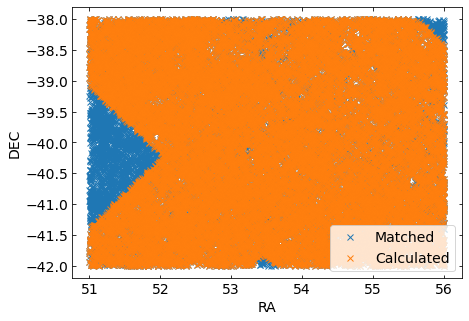

In [156]:
#plt.plot(data['ra'][joint_area_mask], data['dec'][joint_area_mask], 'xr', label='CosmoDC2 RedMagic')
plt.figure(figsize = (7,5))
plt.plot(roman_ra_full, roman_dec_full,'x',label='Matched')
plt.plot(roman_ra, roman_dec,'x',label='Calculated')
plt.xlabel('RA',fontsize = 14)
plt.ylabel('DEC',fontsize = 14)
plt.legend(fontsize = 14,loc = 'lower right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

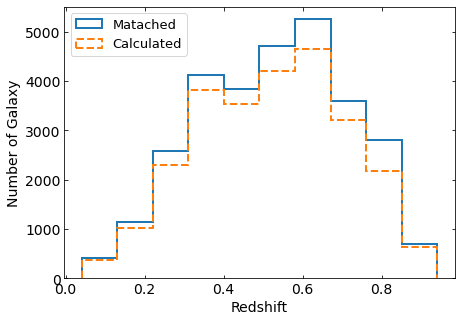

In [158]:
plt.figure(figsize = (7,5))
plt.hist(data['zspec'][joint_area_mask],histtype='step',ls = '-',linewidth = 2,bins = 10,label = 'Matached');
#plt.hist(z_roman_full,histtype='step',ls = '--',linewidth = 2,bins = 10);
plt.hist(z,histtype='step',ls = '--',linewidth = 2,bins = 10, label = 'Calculated')
plt.legend(loc = 'upper left',fontsize = 13)
plt.xlabel('Redshift',fontsize = 14)
plt.ylabel('Number of Galaxy',fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [161]:
Roman_mags = np.load('/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/data/roman_mags.npy')
Rubin_mags = np.load('/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/data/Rubin_mags.npy')

In [179]:
def calc_color (Cat):
    color = list()
    for m in Cat:
        color.append(m[:-1]-m[1:])
    return(color)
Roman_colors = calc_color(Roman_mags)
Rubin_colors =calc_color(Rubin_mags)

In [208]:
Rubin_colors = np.array(Rubin_colors)
Roman_colors = np.array(Roman_colors)

In [190]:
Rubin_colors[:,0]

array([2.12055447, 2.1408451 , 1.4545202 , ..., 2.36307617, 2.39318491,
       2.36701126])

In [187]:
Rubin_mags[0][:-1]-Rubin_mags[0][1:]

array([2.12055447, 1.53330679, 1.15211967, 0.41781308, 0.31272885])

In [172]:
Rubin_colors[0]

array([-0.0842822 , -0.06399157, -0.05736227, -0.0512219 , -0.06043314,
       -0.05328182])

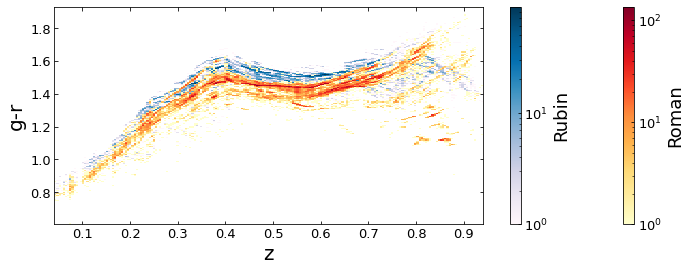

In [265]:
f,ax = plt.subplots(1,1,figsize = (12,4))
gal_clr_rubin = Rubin_colors[:,1]
gal_clr_roman = Roman_colors[:,1]
#plt.plot(data['redshift'], gal_clr,'.k')
h1 = ax.hist2d(z, gal_clr_rubin, bins=200, cmap='PuBu', norm=clr.LogNorm(),label = 'Rubin')
h2 = ax.hist2d(z, gal_clr_roman, bins=200, cmap='YlOrRd', norm=clr.LogNorm(),label = 'Roman')
#ax.colorbar(label='population density')
ax.set_ylabel('%s-%s'%('g','r'),fontsize = 20)
ax.set_xlabel('z',fontsize = 20)
cb1 = fig.colorbar(h2[3], ax=ax,label = 'Roman')
cb2 = fig.colorbar(h1[3], ax=ax)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.yticks(fontsize=14);
cb2.ax.tick_params(labelsize=13) 
cb1.ax.tick_params(labelsize=13) 
cb1.set_label(label = 'Roman',fontsize =18)
cb2.set_label(label = 'Rubin',fontsize =18)

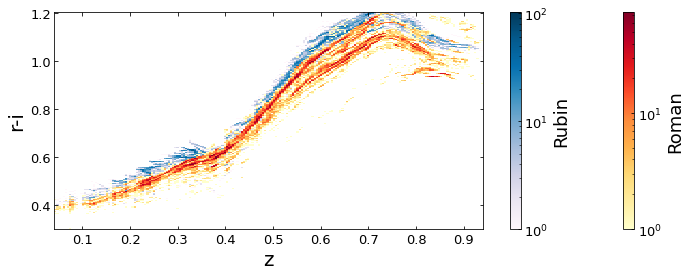

In [266]:
f,ax = plt.subplots(1,1,figsize = (12,4))
gal_clr_rubin = Rubin_colors[:,2]
gal_clr_roman = Roman_colors[:,2]
#plt.plot(data['redshift'], gal_clr,'.k')
h1 = ax.hist2d(z, gal_clr_rubin, bins=200, cmap='PuBu', norm=clr.LogNorm(),label = 'Rubin')
h2 = ax.hist2d(z, gal_clr_roman, bins=200, cmap='YlOrRd', norm=clr.LogNorm(),label = 'Roman')
#ax.colorbar(label='population density')
ax.set_ylabel('%s-%s'%('r','i'),fontsize = 20)
ax.set_xlabel('z',fontsize = 20)
cb1 = fig.colorbar(h2[3], ax=ax,label = 'Roman')
cb2 = fig.colorbar(h1[3], ax=ax)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.yticks(fontsize=14);
cb2.ax.tick_params(labelsize=13) 
cb1.ax.tick_params(labelsize=13) 
cb1.set_label(label = 'Roman',fontsize =18)
cb2.set_label(label = 'Rubin',fontsize =18)
#ax.set_ylim(0.2,1.35)